# Algoritmo de Grover en Qiskit
Este cuaderno tiene como propósito implementar y resolver el algoritmo de Grover utilizando la librería Qiskit de IBM. A lo largo del cuaderno se explicarán los conceptos fundamentales del algoritmo, se mostrará cómo construir el circuito cuántico correspondiente y se analizarán los resultados obtenidos, aprovechando las herramientas que ofrece Qiskit para la computación cuántica.
## Fuente
La fuente de este cuaderno es tomada de los videos de Ket.G 

In [1]:
# Importamos las librerías necesarias
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

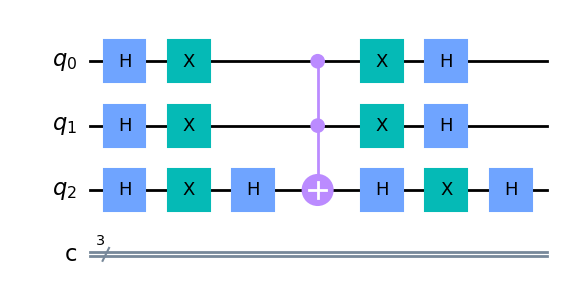

In [2]:
# Implementamos la puerta de Grover

Grover = QuantumCircuit(3,3)

Grover.h(range(3))
Grover.x(range(3))

#CORRECCIÓN !!!
# Si el ccz lo implementamos de esta manera estaremos cambiando algunas amplitudes que no debemos
# la solución está en recordar que Z = HXH


Grover.h(2)
Grover.mct([0,1],2,0) # esto es el cccx, el primer parámetro indica los qubits de control, el segundo
Grover.h(2)             # el qubit objetivo. Finalmente poned un cero, no deis importancia a ese valor

#Grover.x(2)
#Grover.z(2)
#Grover.x(2)
#Grover.mct(range(2),2,0)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output = "mpl")

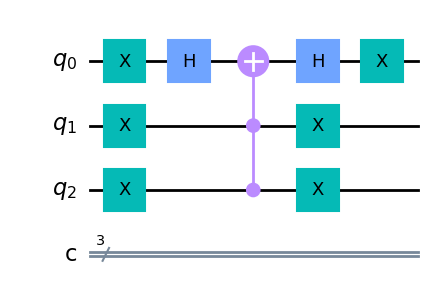

In [19]:
# Esta es la función que podeis cambiar para buscar nuevos elementos

Detector = QuantumCircuit(3,3)

# # Paso 1: Convierte los ceros del estado objetivo en unos usando X
# Detector.x(1)  # Qubit 1 debe ser 0, así que lo invertimos

# # Paso 2: Aplica la puerta CCZ (control-control-Z) para marcar |101⟩
# Detector.h(2)                # H para convertir Z en X en el qubit objetivo
# Detector.ccx(0,1,2)          # CCX (Toffoli) con controles en qubits 0 y 1, objetivo en 2
# Detector.h(2)

# # Paso 3: Deshaz la inversión
# Detector.x(1)


# Paso 1: Convierte los ceros del estado objetivo en unos usando X
Detector.x(1)  # Qubit 1 debe ser 0, así que lo invertimos
Detector.x(2)  # Qubit 2 debe ser 0, así que lo invertimos
Detector.x(0)  # Qubit 2 debe ser 0, así que lo invertimos

# Paso 2: Aplica la puerta CCZ (control-control-Z) para marcar |101⟩
Detector.h(0)                # H para convertir Z en X en el qubit objetivo
Detector.ccx(1,2,0)          # CCX (Toffoli) con controles en qubits 0 y 1, objetivo en 2
Detector.h(0)

# Paso 3: Deshaz la inversión
Detector.x(1)
Detector.x(2)
Detector.x(0)

Detector.draw(output="mpl")

C:\Users\xillegas\AppData\Local\Temp\ipykernel_3520\797721555.py:4: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ + Detector
C:\Users\xillegas\AppData\Local\Temp\ipykernel_3520\797721555.py:6: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ + Grover


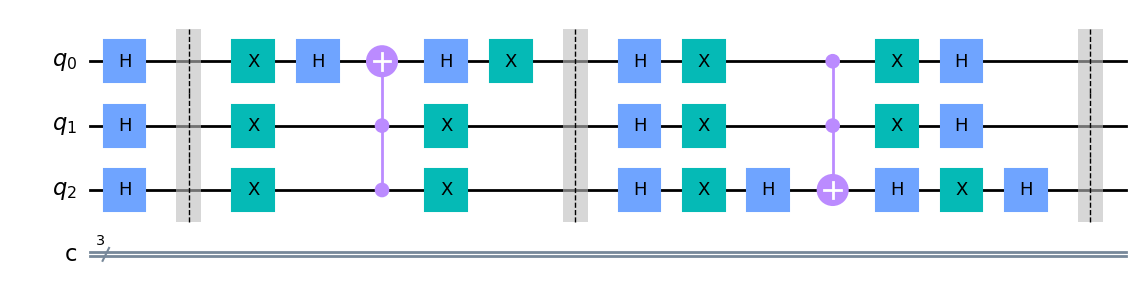

In [20]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ + Detector
circ.barrier(range(3))
circ = circ + Grover
circ.barrier(range(3))
#circ.measure(range(3), range(3))
circ.draw(output = "mpl")

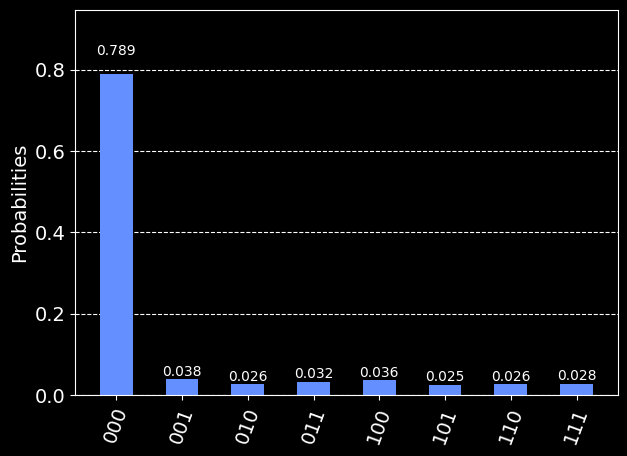

In [21]:
from qiskit import transpile
from qiskit.providers.aer import AerSimulator

circ.measure(range(3), range(3))

simulator = AerSimulator()
circ_t = transpile(circ, simulator)
job = simulator.run(circ_t, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [22]:
input()

'2'